In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('heart.csv')

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
able defect
sable defect

In [5]:
data.head(

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
data.shape

(1025, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

no null values

### Drop Duplicate Data

In [14]:
data_dup = data.duplicated().any()
print(data_dup)

True


In [15]:
data = data.drop_duplicates()

In [16]:
data.shape

(302, 14)

# Get Overall Statistics

In [17]:
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Draw Correlation Matrix

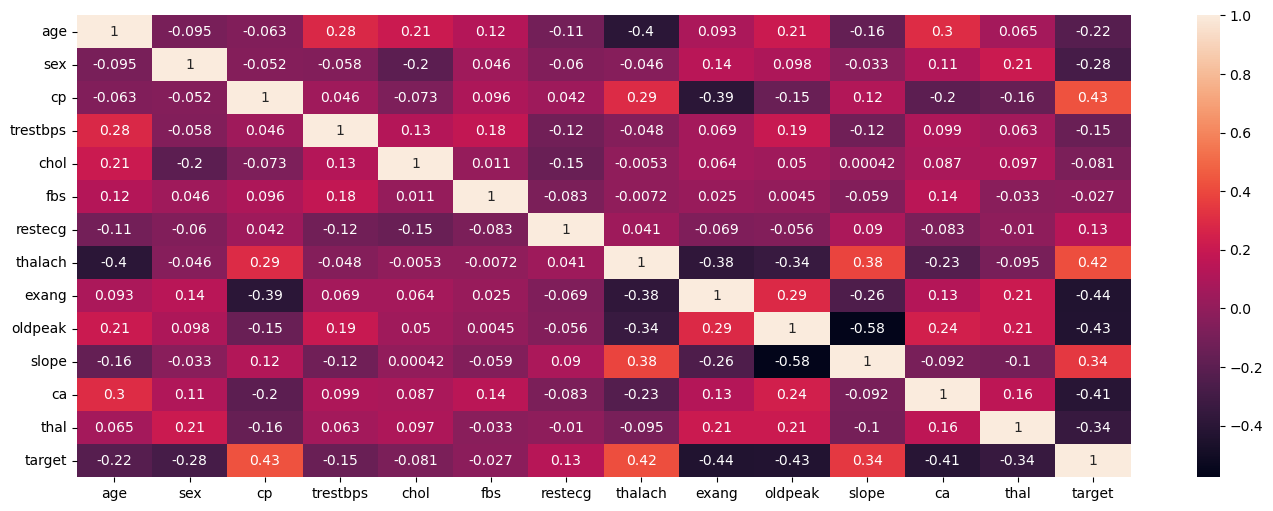

In [37]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

### How Many People Have Heart Disease?

In [23]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

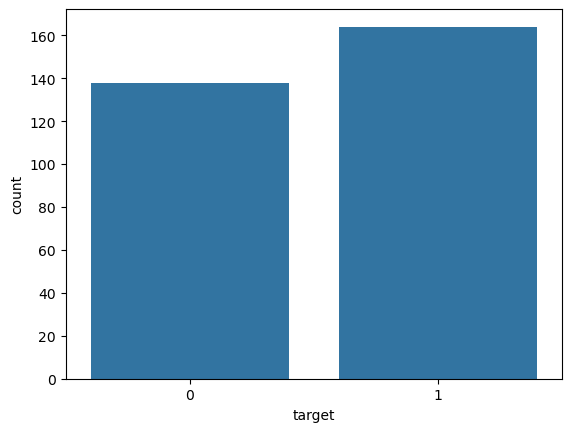

In [35]:
sns.countplot(x=data['target'])
plt.show()

### Male/Female Count

In [31]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

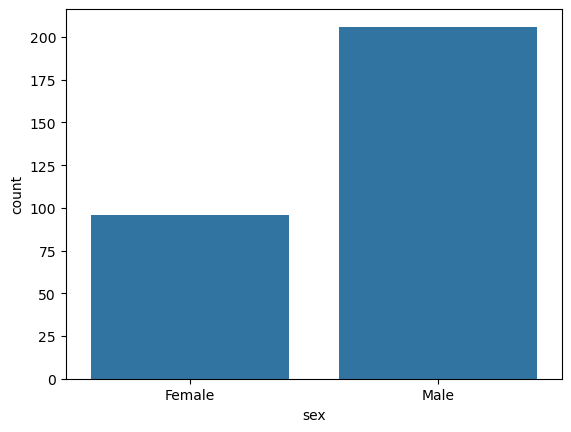

In [34]:
sns.countplot(x=data['sex'])
plt.xticks([0,1],['Female','Male'])
plt.show()

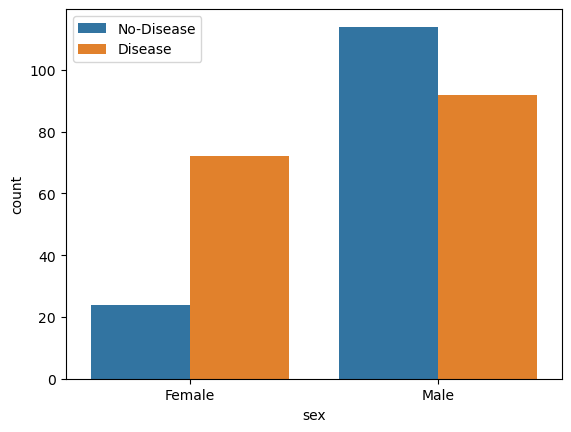

In [40]:
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

### Check Age Distribution In The Dataset

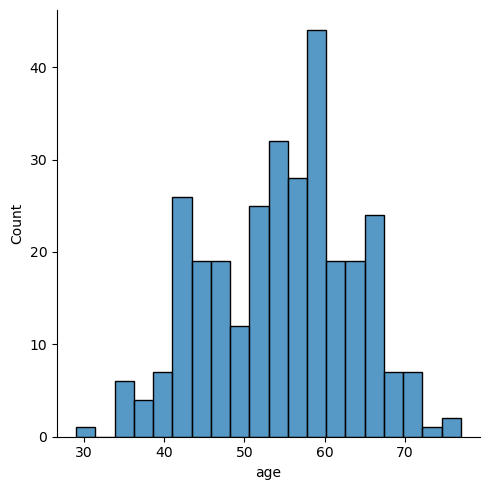

In [43]:
sns.displot(data['age'],bins=20)
plt.show()

most people in the study had an age from 50 to 60

### Chest Pain

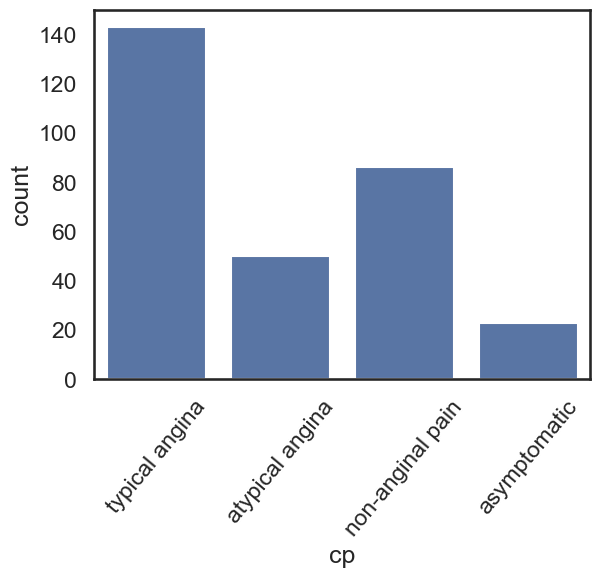

In [64]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3],['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xticks(rotation=50)
plt.show()

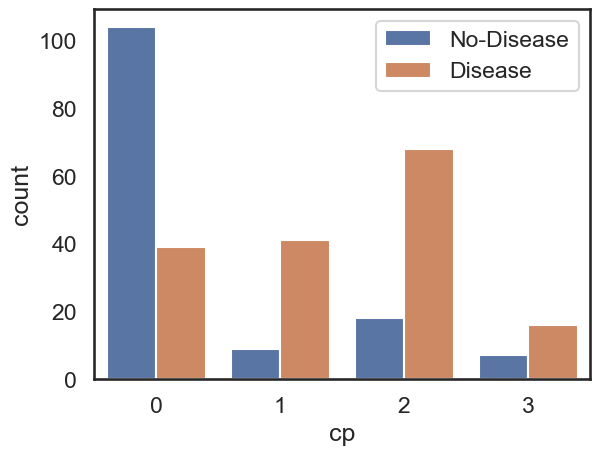

In [66]:
sns.countplot(x='cp',hue='target',data=data)
plt.legend(labels=['No-Disease','Disease'])
plt.show()

### Fasting Blood Sugar Distribution

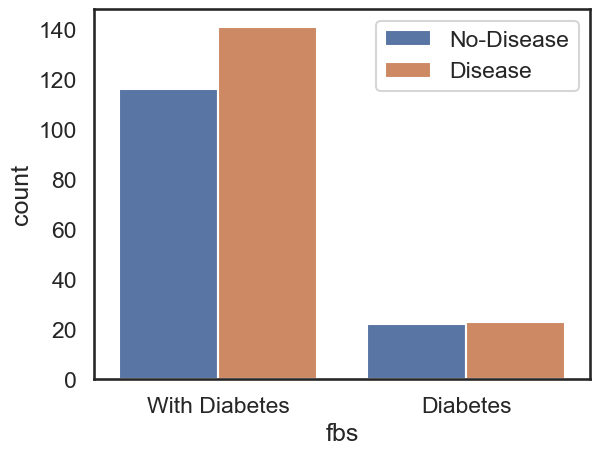

In [68]:
sns.countplot(x='fbs',hue='target',data=data)
plt.xticks([1,0],['Diabetes','With Diabetes'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

### Resting Blood Sugar

In [69]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'hue_dummy'],
      dtype='object')

<Axes: >

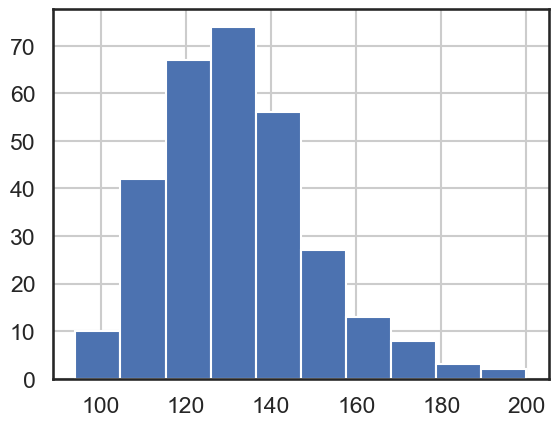

In [70]:
data['trestbps'].hist()

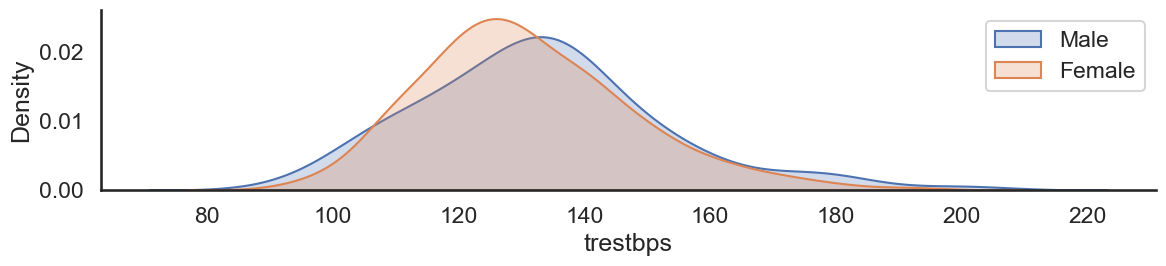

In [79]:
g = sns.FacetGrid(data, hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
plt.show()

female have lower resting blood pressure compared to men

### Serum Cholesterol

<Axes: >

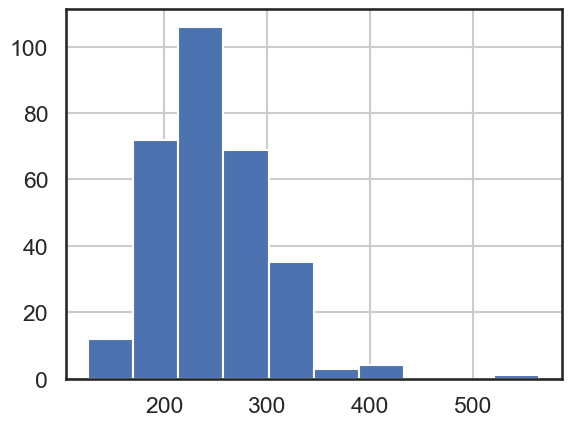

In [80]:
data['chol'].hist()

### Plot Continuous Variables

In [83]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [84]:
cate_val

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'target',
 'hue_dummy']

In [85]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

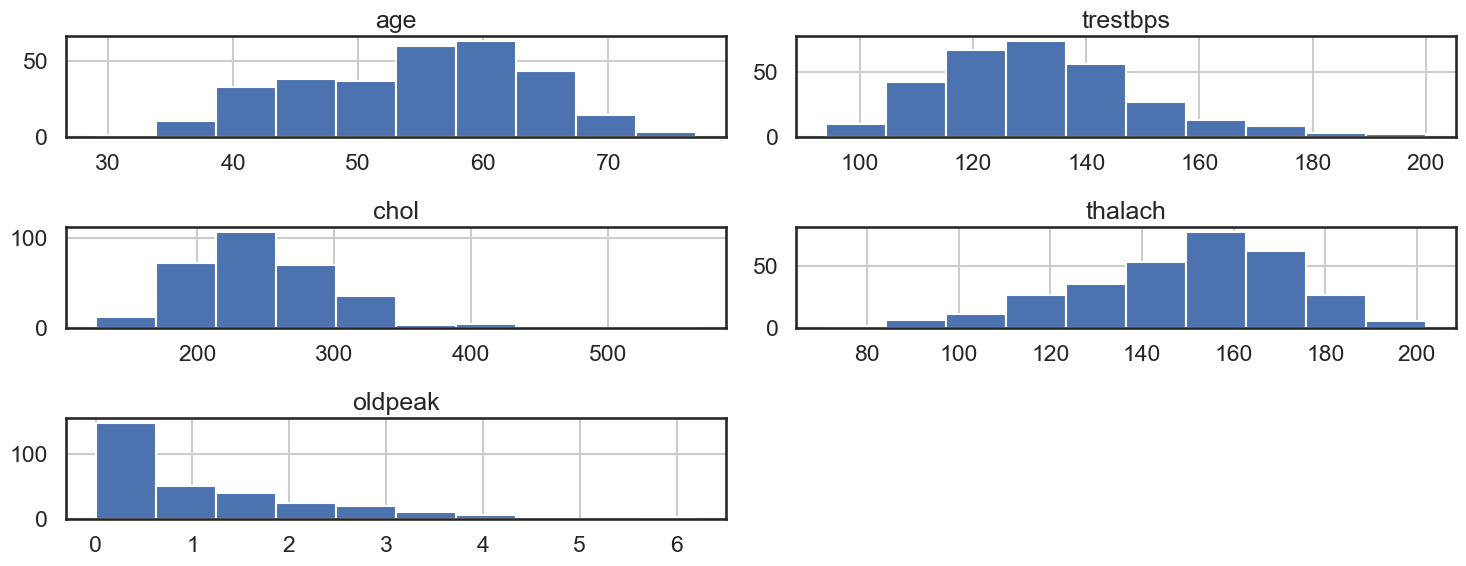

In [90]:
data.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()